#Tarea 1: Machine Learning probabilistico

Martina Cádiz

Nota: correr el codigo en orden (no por secciones u.u)

##Parte 2

Usando Python, y aplicando la técnica del ancestral sampling, obtenga 10
muestras del modelo probabilistico dado.

In [125]:
import numpy as np
np.random.seed(42)

In [126]:
#Información problema
n = 6
a,b,c,d = 1,1,1,1
z,x = [0]*n, [0]*n
samples_z, samples_x = [],[]
n_samples = 10

In [127]:
for i in np.arange(n_samples):
  z[0] = np.random.normal(0, 1)
  x[0] = np.random.normal(c*z[0]+d, 1)

  for i in np.arange(start=1, stop=n):
    z[i] = np.random.normal(a*z[i-1]+b, 1)
    x[i] = np.random.normal(c*z[i]+d, 1)
  #vectores que almacenan las muestras
  samples_x.append(x) 
  samples_z.append(z)
  z,x = [0]*n, [0]*n

## Parte 3

Con las muestras obtenidas previamente grafique: la serie de tiempo de
x, la serie de tiempo de z y las muestras de x6 en función de z6.

### Serie de tiempo de X

In [128]:
# Graficar
import matplotlib.pyplot as plt
import pandas as pd

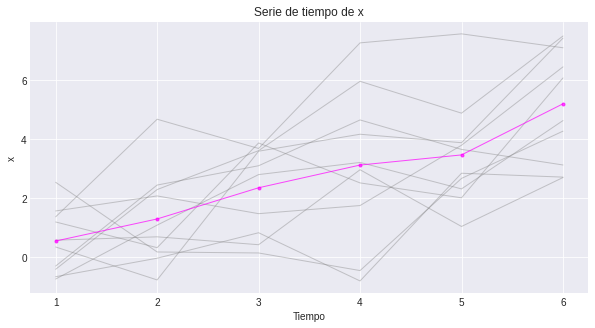

In [129]:
#Datos de la muestra de X
df_x = pd.DataFrame({'t': np.arange(n), 'x1': samples_x[0], 'x2': samples_x[1], 'x3': samples_x[2], 'x4': samples_x[3], 'x5': samples_x[4], 'x6': samples_x[5], 'x7': samples_x[6] , 'x8': samples_x[7],'x9': samples_x[8],'x10': samples_x[9]    })

#Estilos gráfico
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
plt.title("Serie de tiempo de x", loc='center')
plt.xlabel("Tiempo")
plt.ylabel("x")

#Líneas de las muestras por cada step de tiempo
for column in df_x.drop('t', axis=1):
    plt.plot(df_x['t']+1, df_x[column], marker='', color='grey', linewidth=1, alpha=0.4)

# La media de todas las muestras de t
plt.plot(df_x['t']+1, df_x.drop('t', axis=1).mean(axis=1), marker='.', color='magenta', linewidth=1, alpha=0.7)


plt.show()

### Serie de tiempo de Z

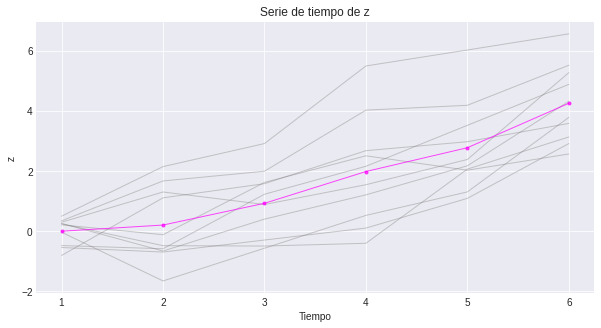

In [130]:
#Datos de la muestra de z
df_z=pd.DataFrame({'t': np.arange(n), 'z1': samples_z[0], 'z2': samples_z[1], 'z3': samples_z[2], 'z4': samples_z[3], 'z5': samples_z[4], 'z6': samples_z[5], 'z7': samples_z[6] , 'z8': samples_z[7],'z9': samples_z[8],'z10': samples_z[9]    })

#Estilos gráfico
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
plt.title("Serie de tiempo de z", loc='center')
plt.xlabel("Tiempo")
plt.ylabel("z")

#Líneas de las muestras por cada step de tiempo
for column in df_z.drop('t', axis=1):
    plt.plot(df_z['t']+1, df_z[column], marker='', color='grey', linewidth=1, alpha=0.4)

# La media de todas las muestras de z
plt.plot(df_z['t']+1, df_z.drop('t', axis=1).mean(axis=1), marker='.', color='magenta', linewidth=1, alpha=0.7)

plt.show()

### x6 en función de z6

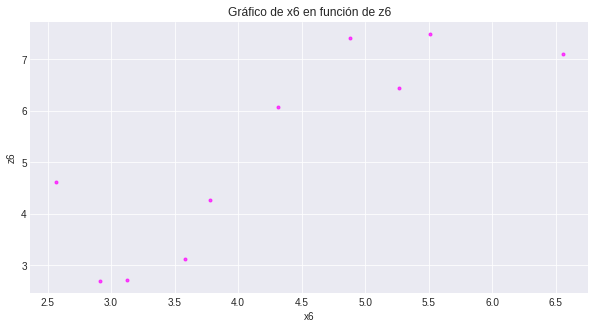

In [131]:
#muestras de x6 y z6 de los vectores que contienen 
x6 = [ samples_x[i][5] for i in np.arange(n_samples)]
z6 = [ samples_z[i][5] for i in  np.arange(n_samples)]

#Estilos gráfico

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
plt.title("Gráfico de x6 en función de z6", loc='center')
plt.xlabel("x6")
plt.ylabel("z6")


# scatterplot de los pts
plt.scatter(z6, x6, marker='.', color='magenta', linewidth=1, alpha=0.7)

plt.show()

# Pregunta 2

A continuación, se puede ver como se cargaron los datos y se graficaron.

In [132]:
!pip install --upgrade xlrd

In [133]:
import pandas as pd
df = pd.read_excel('/content/Indicador.xls',header=[3])
df = df.set_index("Dia")
#Se añade una columna para trabajar el tiempo de una manera más sencilla
df['Tiempo'] = np.arange(len(df))+1

df.tail(10)

,Valor,Tiempo
Dia,,
2022-04-13,806.73,101
2022-04-14,804.78,102
2022-04-15,NaN,103
2022-04-16,NaN,104
2022-04-17,NaN,105
2022-04-18,814.73,106
2022-04-19,817.70,107
2022-04-20,818.18,108
2022-04-21,816.29,109


In [134]:
#Se dropearon los valores que no estaban
print(df.shape)
df=df.dropna()
print(df.shape)

(110, 2)
(79, 2)


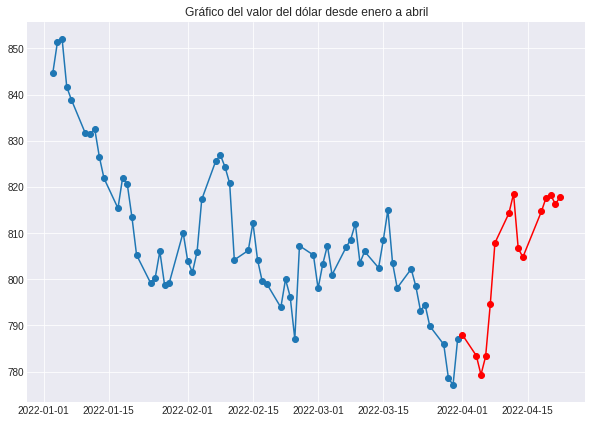

In [135]:
from datetime import datetime
import matplotlib.pyplot as plt 

#Gráfico de los datos
x_1= df[df.index.month < 4 ].index
y_1=df[df.index.month < 4 ]['Valor']

x_2= df[df.index.month == 4 ].index
y_2=df[df.index.month == 4 ]['Valor']

plt.plot(x_1,y_1,marker="o")
plt.plot(x_2,y_2,marker="o",color='red')
plt.title('Gráfico del valor del dólar desde enero a abril')
plt.gcf().set_size_inches(10, 7)
plt.show()

## Parte 1 

Ajuste un modelo de Gaussian Process sobre los datos de Enero, Febrero
y Marzo del 2022. Explique el kernel usado para el modelo. 

Se realizó un producto entre 3 kernels y luego se les sumó un kernel con ruido gaussiano.
El kernel con ruido se escogió para darle un poco de libertad a la predicción, es decir buscar generalizar mejor.
Entre los otros 3 kernels se encuentra uno periódico, ya que la alza del dolar es un evento periódico (las ondas eran anchas, por lo que se otorgó 3 de periodicidad), también se usó uno cuadrático ya que se vió que en Abril iba aumentando el valor del dólar (habían hartas irregularidades) y por último se utilizó el RBF para suavizar la curva de tendencia. Cabe señalar que los hiperparametros de c/u kernel se fueron ajustando a medida que se buscaba calzar mejor con la muestra.


In [145]:
#Conjunto de entrenamiento
x_train = (df[df.index.month < 4 ]['Tiempo']).to_numpy().reshape(-1, 1)
y_train = df[df.index.month < 4 ]["Valor"].to_numpy()

In [146]:
#Conjunto de test -> del 1 al 18 de abril
x_test = (df[ (df.index.month == 4 ) & (df.index.day < 19)]['Tiempo']).to_numpy().reshape(-1, 1)
y_test  = df[ (df.index.month == 4 ) & (df.index.day < 19)]["Valor"].to_numpy()

In [147]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,DotProduct,Matern,RationalQuadratic,WhiteKernel, ExpSineSquared
 

periodico = 1.0 * ExpSineSquared(length_scale=1.0,periodicity=3.0) 
estacionario = 2.0 ** 2 * RBF(length_scale=80.0)
ruido = WhiteKernel(noise_level=0.1367)
cuadratico = RationalQuadratic(alpha=2.89, length_scale=5)
kernel = estacionario * cuadratico  * periodico + WhiteKernel(noise_level=0.5) 
gpr = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=100)
gpr.fit(x_train, y_train)
print(gpr.kernel_)

ypred, std = gpr.predict(x_test, return_std=True)




/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


25.3**2 * RBF(length_scale=7.93e+04) * RationalQuadratic(alpha=0.000328, length_scale=445) * 32.1**2 * ExpSineSquared(length_scale=735, periodicity=0.871) + WhiteKernel(noise_level=23)


##Parte 2
Realice una predicción entre los dias 1 y 18 de Abril y evaluee sus resultados.

In [148]:
#Se utilizó la métrica MSE para evaluar las predicciones

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ypred) 

#El valor es elevado debido a que no es un buen modelo

341.4561885045535

In [149]:
#También se evalúo con el score de gp
print(f'score conjunto de test {gpr.score(x_test, y_test)}')

score conjunto de test -0.834661245350083


##Parte 3
Grafique los ajustes del proceso gaussiano incluyendo la media y desviaci´on
estandar; grafique la predicción del proceso gaussiano para el mes de Abril.

Text(0, 0.5, 'Valor')

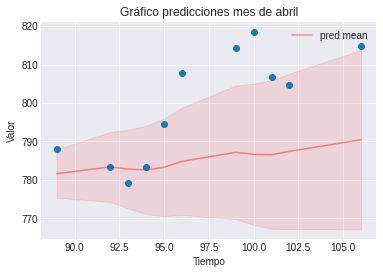

In [150]:
#En estre gráfico está el mes de abril 1- 18
plt.plot(x_test, ypred, label='pred mean', color='r', alpha=0.4)

plt.fill_between(x_test.ravel(), ypred - std, ypred+ std, color='r', alpha=0.1)
plt.scatter(x_test, y_test)
plt.legend()
plt.title("Gráfico predicciones mes de abril", loc='center')
plt.xlabel("Tiempo")
plt.ylabel("Valor")

In [151]:
#Conjunto de test -> todo el mes de abril incluyendo conjunto de test + train
x_ = (df['Tiempo']).to_numpy().reshape(-1, 1)
y_  = df["Valor"].to_numpy()

In [152]:
ypred, std = gpr.predict(x_, return_std=True)

Text(0, 0.5, 'Valor')

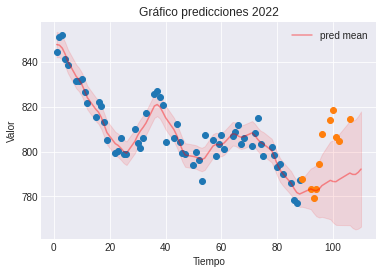

In [153]:
plt.plot(x_, ypred, label='pred mean', color='r', alpha=0.4)

plt.fill_between(x_.ravel(), ypred - std, ypred+ std, color='r', alpha=0.1)
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.legend()
plt.title("Gráfico predicciones 2022", loc='center')
plt.xlabel("Tiempo")
plt.ylabel("Valor")